## Import TrafPy Generator

In [1]:
%load_ext autoreload
import trafpy.generator as tpg

## Set Global Variables

Set global vars. To change a global a global var, edit this cell and re-run the cell.

- PATH: The path to the folder where you want to save and/or load data. 
- NUM_DEMANDS: Number of demands to generate.

In [2]:
%autoreload
PATH = r'data/interactive_test/'
NUM_DEMANDS = 150000

## Generate Random Variables from 'Named' Distribution

Generate a distribution of random variables using one of the following standard named distributions:

- exponential
- lognormal
- weibull
- pareto

This might be e.g. interarrival times, sizes, number of nodes in a job, probability of job dependency/edge formation etc...

In [12]:
%autoreload
rand_vars = tpg.gen_named_val_dist(dist='lognormal',
                                   interactive_plot=True,
                                   xlim=None,
                                   min_val=1,
                                   max_val=2e7,
                                   round_to_nearest=10, # None
                                   num_decimal_places=2,
                                   rand_var_name='Flow Size',
                                   prob_rand_var_less_than=[4847, 9431],
                                   num_bins=20,
                                   size=NUM_DEMANDS)

interactive(children=(FloatText(value=0.1, description='_mu:', step=0.05), FloatText(value=1.0, description='_…

In [ ]:
%autoreload
# save
filename = 'random_variable'
tpg.pickle_data(PATH+filename, rand_vars.result)

## Generate Random Variables from Arbitrary 'Multimodal' Distribution

In previous cells we considered standard distributions (exponential, lognormal, weibull, pareto...). These are common distributions which occur in many different scenarios. However, sometimes in real scenarios distributions might not fall into these well-defined distribution categories. 

Multimodal distributions are distributions with >= 2 different modes. A multimodal distribution with 2 modes is a special case called a 'bimodal distribution', which is very common. 

The traffic toolbox allows you to generate arbitrary multimodal distributions. This is very powerful because with access to the above standard distributions and the arbitrary multimodal distribution generator, any distribution can be generated if you are able to shape it sufficiently.

Generating multimodal distributions is a little more involved than generating the standard distributions was, but it can still be done in a matter of seconds using this notebook's visualisation tool. 

There are a few simple steps to generating an arbitrary multimodal distribution:

1. Decide the number of modes (i.e. peaks) and other distribution characteristics
2. Shape each mode individually
3. Combine all of modes together and add some 'background noise' to the distribution such that the modes are 'joined' together to form a single multimodal distribution (background noise can be set to 0 if desired)
4. Use your multimodal distribution to generate demands
5. Save the generated demands

In [30]:
%autoreload
# 1. define distribution variables
min_val=1
max_val=10000
num_modes=4
xlim=None
rand_var_name='Interarrival Time'
round_to_nearest=1
num_decimal_places=1

In [31]:
%autoreload
# 2. shape each mode
data_dict = tpg.gen_skew_dists(min_val=min_val,
                               max_val=max_val,
                               num_modes=num_modes,
                               xlim=xlim,
                               rand_var_name=rand_var_name,
                               round_to_nearest=round_to_nearest,
                               num_decimal_places=num_decimal_places)

interactive(children=(BoundedIntText(value=5000, description='Location:', max=10000, min=1), FloatText(value=0…

interactive(children=(BoundedIntText(value=5000, description='Location:', max=10000, min=1), FloatText(value=0…

interactive(children=(BoundedIntText(value=5000, description='Location:', max=10000, min=1), FloatText(value=0…

interactive(children=(BoundedIntText(value=5000, description='Location:', max=10000, min=1), FloatText(value=0…

In [32]:
%autoreload
# 3. combine modes to form multimodal probability distribution
multimodal_prob_dist = tpg.combine_multiple_mode_dists(data_dict,
                                                       min_val=min_val,
                                                       max_val=max_val,
                                                       xlim=xlim,
                                                       rand_var_name=rand_var_name,
                                                       round_to_nearest=round_to_nearest,
                                                       num_decimal_places=num_decimal_places)

interactive(children=(FloatText(value=0.5, description='bg_factor', step=0.001), Checkbox(value=False, descrip…

In [27]:
%autoreload
# 4. use dist to generate random variables
rand_vars = tpg.gen_rand_vars_from_discretised_dist(unique_vars=list(multimodal_prob_dist.result.keys()),
                                                    probabilities=list(multimodal_prob_dist.result.values()),
                                                    num_demands=NUM_DEMANDS)

In [ ]:
%autoreload
# 5. save
filename = 'multimodal_random_variable'
tpg.pickle_data(PATH+filename, rand_vars)

## Generate Discrete Probability Distribution from Random Variables

Previous cells generated random variable data. However, sometimes it might be desirable to have the probability distribution/probability mass function (PMF) of the generated data rather than all the original generated data. Using the PMF, anyone can sample randomly from the PMF to produce new data with similar characteristics to the original data which you generated.

Run this cell to load your previously generated distribution data and convert it into a PMF

In [ ]:
%autoreload
filename = 'multimodal_random_variable_v2'

rand_vars = tpg.unpickle_data(PATH+filename)
xk, pmf = tpg.gen_discrete_prob_dist(rand_vars, 
                                     round_to_nearest=None,
                                     num_decimal_places=2)
prob_dist = {var: prob for var,prob in zip(xk,pmf)}

In [ ]:
%autoreload
# save
filename = 'prob_dist'
tpg.pickle_data(PATH+filename, prob_dist)

## Generate Random Variables from Discrete Probability Distribution

Load a previously saved distribution and sample from it to generate any number of random variable data points. This function/cell does not plot the distribution, which avoids long delay times when trying to generate very large amounts of data.

E.g. to generate 1,000,000 demands, would first shape the distribution visually with above cells for e.g. 10,000 demands, then save the discretised distribution, then in the below cell set num_demands in func below to 1,000,000 and run the cell to generate 1,000,000 demands from the previously shaped distribution.

In [ ]:
%autoreload
filename = 'prob_dist_v2'

prob_dist = tpg.unpickle_data(PATH+filename)
rand_vars = tpg.gen_rand_vars_from_discretised_dist(unique_vars=list(prob_dist.keys()),
                                                    probabilities=list(prob_dist.values()),
                                                    num_demands=NUM_DEMANDS)

In [ ]:
%autoreload
# save
filename = 'random_variables_from_prob_dist'
tpg.pickle_data(PATH+filename, rand_vars)

## Generate Source-Destination Node Distribution

Generate a probability matrix describing the probability distribution of each source-node pair in a network.

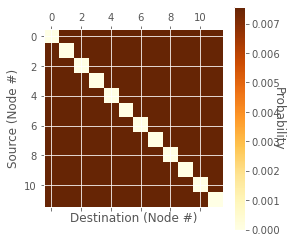

In [14]:
%autoreload
ENDPOINTS = ['ep_'+str(i) for i in range(12)] # define network endpoints


# comment out all except one below

node_dist, _ = tpg.gen_uniform_node_dist(eps=ENDPOINTS,
                                         show_fig=True,
                                         print_data=False)

# node_dist, _ = tpg.gen_multimodal_node_dist(eps=ENDPOINTS,
#                                             skewed_nodes=[],
#                                             skewed_node_probs=[],
#                                             num_skewed_nodes=None,
#                                             show_fig=True,
#                                             print_data=True)

# node_dist, _ = tpg.gen_multimodal_node_pair_dist(eps=ENDPOINTS,
#                                                  skewed_pairs=[],
#                                                  skewed_pair_probs=[],
#                                                  num_skewed_pairs=None,
#                                                  show_fig=True,
#                                                  print_data=True)

In [ ]:
%autoreload
# save
filename = 'node_dist'
tpg.pickle_data(PATH+filename, node_dist)

## Use Node Distribution to Generate Source-Destination Node Demands

Sample from a previously generated source-destination probability matrix to generate source-destination node pair demands.

In [ ]:
%autoreload
filename = 'node_dist'

node_dist = tpg.unpickle_data(PATH+filename)
node_demands = tpg.gen_node_demands(eps=ENDPOINTS,
                                    node_dist=node_dist,
                                    num_demands=NUM_DEMANDS)

In [ ]:
%autoreload
# save
filename = 'node_demands'
tpg.pickle_data(PATH+filename, node_demands)

## Use Previously Generated Distributions to Create Single 'Demand Data' Dictionary

Rather than having distributions spread across individual pickles or csvs, combine them into a demand_data dictionary. Can do this for 1) flow-centric demand data and 2) job-centric demand data.

In [ ]:
%autoreload
# flow-centric demand data
flow_size_dist = tpg.unpickle_data(PATH+'flow_size_dist')
interarrival_time_dist = tpg.unpickle_data(PATH+'interarrival_time_dist')
node_dist = tpg.unpickle_data(PATH+'node_dist')

flow_centric_demand_data = tpg.create_demand_data(num_demands=NUM_DEMANDS,
                                                  eps=ENDPOINTS,
                                                  node_dist=node_dist,
                                                  flow_size_dist=flow_size_dist,
                                                  interarrival_time_dist=interarrival_time_dist,
                                                  print_data=True)
print('Flow data:\n{}'.format(flow_centric_demand_data))

In [ ]:
%autoreload
# job-centric demand data
flow_size_dist = tpg.unpickle_data(PATH+'flow_size_dist')
interarrival_time_dist = tpg.unpickle_data(PATH+'interarrival_time_dist')
node_dist = tpg.unpickle_data(PATH+'node_dist')
num_ops_dist = tpg.unpickle_data(PATH+'num_ops_dist')

job_centric_demand_data = tpg.create_demand_data(num_demands=config.NUM_DEMANDS,
                                                 eps=ENDPOINTS,
                                                 node_dist=node_dist,
                                                 flow_size_dist=flow_size_dist,
                                                 interarrival_time_dist=interarrival_time_dist,
                                                 num_ops_dist=num_ops_dist,
                                                 c=1.5,
                                                 use_multiprocessing=False,
                                                 print_data=True)
print('Job data:\n{}'.format(job_centric_demand_data))

## Generate Distribution(s) in Set(s)/Loop(s)

*(This is effectively an extension of the above interactive toolbox)*

Sometimes, you may wish to generate e.g. 10 different sets of 10,000 demands, each with a different distribution. Doing this is easy, but does require a couple of lines of programming. To save time in generating large numbers of demands, no interactive visualisation is done here. Instead, you should use the above cells to shape your distributions, note down the parameters you decided on, and then enter your desired parameters in the code below. The code should then use your distribution characteristics to generate multiple sets of demand data.

In [ ]:
%autoreload
import trafpy.generator as tpg
import time
import copy

# set vars
path = r'data/interactive_test/sets/'
endpoints = ['ep_'+str(i) for i in range(5)]
num_sets = 10 # init number of sets you want to generate
num_demands = 10 # init number of demands you want to generate for each set


# init demand object and dicts for saving
dists = {'set': [],
         'node_dist': [],
         'flow_size_dist': [],
         'interarrival_time_dist': []}
data = {'set': [],
        'source_nodes': [], 
        'destination_nodes': [],
        'flow_sizes': [], 
        'interarrival_times': []}

# set any distributions you want to keep constant for all sets
flow_size_dist = tpg.gen_named_val_dist(dist='weibull',
                                        params={'_alpha': 1.4, '_lambda': 7000},
                                        return_data=False,
                                        round_to_nearest=100)
interarrival_dist = tpg.gen_named_val_dist(dist='exponential',
                                           params={'_beta': 1.0},
                                           return_data=False,
                                           round_to_nearest=0.01)

# generate demands for each set
started = time.time()
for s in range(num_sets):
    start = time.time()
    
    # define distributions for this set
    node_dist = tpg.gen_multimodal_node_dist(eps=endpoints,
                                             skewed_nodes=[],
                                             skewed_node_probs=[],
                                             num_skewed_nodes=int(len(endpoints)*0.05))
    dists['set'].append(s+1)
    dists['node_dist'].append(copy.deepcopy(node_dist))
    dists['flow_size_dist'].append(copy.deepcopy(flow_size_dist))
    dists['interarrival_time_dist'].append(copy.deepcopy(interarrival_dist))
    
    # sample variables from distributions for this set
    sn,dn = tpg.gen_node_demands(eps=endpoints,
                                 node_dist=node_dist, 
                                 num_demands=num_demands)
    flow_sizes = tpg.gen_rand_vars_from_discretised_dist(unique_vars=list(flow_size_dist.keys()),
                                                         probabilities=list(flow_size_dist.values()),
                                                         num_demands=num_demands)
    interarrival_times = tpg.gen_rand_vars_from_discretised_dist(unique_vars=list(interarrival_dist.keys()),
                                                                 probabilities=list(interarrival_dist.values()),
                                                                 num_demands=num_demands)
    data['set'].append(s+1)
    data['source_nodes'].append(copy.deepcopy(sn))
    data['destination_nodes'].append(copy.deepcopy(dn))
    data['flow_sizes'].append(copy.deepcopy(flow_sizes))
    data['interarrival_times'].append(copy.deepcopy(interarrival_times))
    
    end = time.time()
    print('Generated {} demands for set {} of {} in {} seconds.'.format(num_demands,s+1,num_sets, end-start))
    
# save generated dists and data
tpg.save_data_as_csv(path_to_save=path+'distributions',
                     data=dists,
                     overwrite=False,
                     print_times=True)
tpg.save_data_as_csv(path_to_save=path+'data',
                     data=data,
                     overwrite=False,
                     print_times=True)
ended=time.time()
print('Generated {} sets of {} demands in {} seconds.'.format(num_sets,num_demands,ended-started))

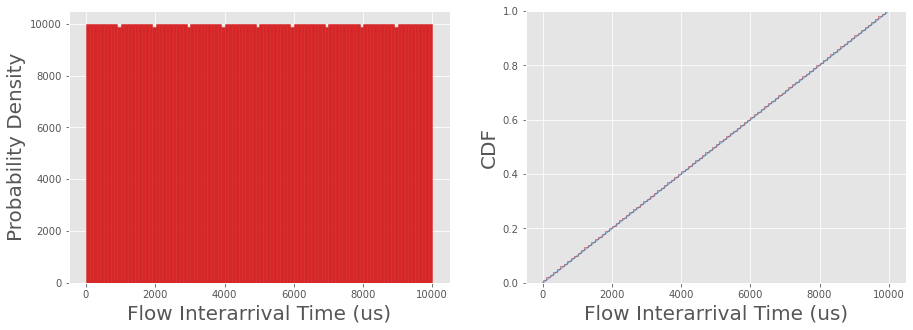

In [5]:
%autoreload
# EXAMPLE OF HOW TO MAKE A UNIFORM DIST
flow_size_dist = tpg.gen_uniform_val_dist(10,
                                          10000,
                                          round_to_nearest=1,
                                          rand_var_name='Flow Interarrival Time (us)',
                                          show_fig=True)